In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D3.csv')
df.head()
M = len(df)
M

100

In [3]:
X = df.values[:, 1] #gets input values from 2nd column
Y = df.values[:, 3] #gets output values from 4th column
m = len(Y) # Number of training examples
print('X = ', X[: 5]) #Show first 5 values
print('Y = ', Y[: 5])
print('m = ', m)

X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


Text(0.5, 1.0, 'Scatter plot of training data')

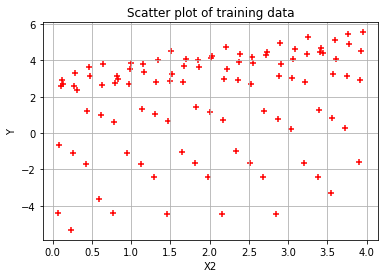

In [4]:
plt.scatter(X, Y, color = 'red',marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

In [5]:
#Creating matrix with single column of ones
X_0 = np.ones((m, 1))
X_0[:5] #Show 5 values of matrix

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
#Reshape function used to convert X from 1D to 2D array of 100x1
X_1 = X.reshape(m, 1)
X_1[:10] #Show first 10 values

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [7]:
#hstack() function from numpy to have X_0 and X_1 in one final Matrix
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [8]:
theta = np.zeros(2)
theta

array([0., 0.])

In [9]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 *m) * np.sum(sqrErrors)
    
    return J

In [10]:
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [11]:
def gradient_descent(X, Y, theta, aplha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, Y, theta)
        
    return theta, cost_history

In [12]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [13]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.71988473 0.56390334]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


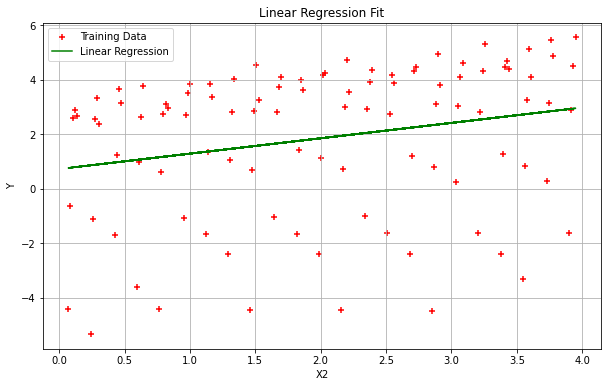

In [14]:
# Since X is a list of list, take the values of column index 1
plt.scatter(X[:,1], Y, color = 'red', marker = '+', label = 'Training Data')
plt.plot(X[:,1],X.dot(theta), color = 'green', label = 'Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

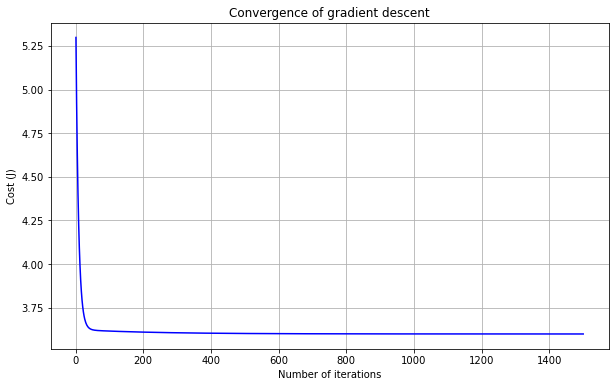

In [15]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')